In [ ]:
# Part (a)

In [13]:



import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [14]:


def DTW (x, y):
    #determine length of each sequence
    Srow, Scolm = len(x), len(y)
    #find mapping between all points of x and y
    
    distance = np.zeros((Scolm, Srow))
    
    #distances array from x to y
    for i in range(Scolm):
        for j in range(Srow):
            distance[i,j] = math.sqrt((x[j]-y[i])**2)
            #build up the accumulated value
            accumulated_value = np.zeros((Scolm, Srow)) 
            #the starting point of the accumulated cost set to (0,0)
            accumulated_value[0,0] = distance[0,0]
            #calculate all the other elements for the plot
    for i in range(1, Scolm):
        for j in range(1, Srow):
            accumulated_value[i, j] = min(accumulated_value[i-1, j-1], accumulated_value[i-1, j], accumulated_value[i, j-1]) + distance[i, j]
    return accumulated_value

In [15]:
#find dimensions of matrix

def warpPath (wp):
    
    [Srow, Scolm ] = wp.shape
    accumulated_value = np.zeros((Scolm, Srow)) 
    path = [[Srow-1, Scolm-1]]
    i = Scolm-1
    j = Srow-1
    while i>0 and j>0:
        
        if i == 0:
            j = j - 1
        elif j==0:
            i = i - 1
            j = j
        else:
            if accumulated_value[i-1, j-1] == min(accumulated_value[i-1, j-1], accumulated_value[i-1, j], accumulated_value[i, j-1]):
                i = i - 1
                j = j - 1
            elif accumulated_value[i-1, j] == min(accumulated_value[i-1, j-1], accumulated_value[i-1, j], accumulated_value[i, j-1]):
                i = i-1
            else:
                j = j - 1
        path.append([j, i])
    path.append([0,0])
    return path

In [ ]:
#Part (b)

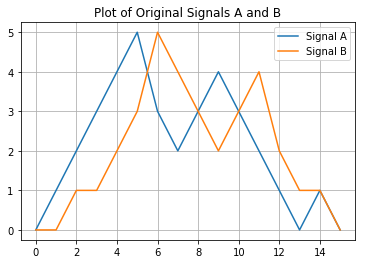

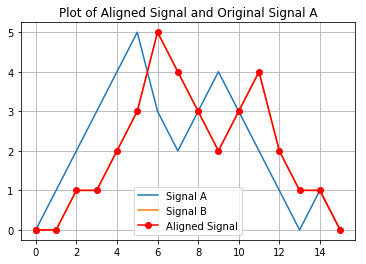

In [16]:
#define two arbitrary sequences (timescale is in units of one)
x =[ 0, 1, 2, 3, 4, 5, 3, 2, 3, 4, 3, 2, 1, 0, 1, 0]
y =[ 0, 0, 1, 1, 2, 3, 5, 4, 3, 2, 3, 4, 2, 1, 1, 0]

#compute accumlated cost matrix and alignment
a = DTW(x,y)
p = warpPath(a)

#plot original signals
plt.title('Plot of Original Signals A and B')
plt.plot(x,label = 'Signal A')
plt.plot(y,label = 'Signal B')

plt.grid()
plt.legend( loc = 'best')
plt.show()

#plot aligned signal
alignment_x=[]
alignment_y=[]

#append the x position and y values for aligned signal
for j,i in p:
    alignment_x.append([j])
    alignment_y.append(y[i])
    
plt.title('Plot of Aligned Signal and Original Signal A')
plt.plot(x,label = 'Signal A')
plt.plot(y,label = 'Signal B')
plt.plot(alignment_x,alignment_y,'bo-',color = 'red', label = 'Aligned Signal')
    
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
#Part (c)

In [17]:
import wfdb

In [18]:
#import two signals (one channel)
record_1 = wfdb.rdrecord('100', sampto = 100, channels=[0]) 
record_2 = wfdb.rdrecord('101', sampto = 100, channels=[0])

In [19]:
signal_A = record_1.p_signal
signal_B = record_2.p_signal


100


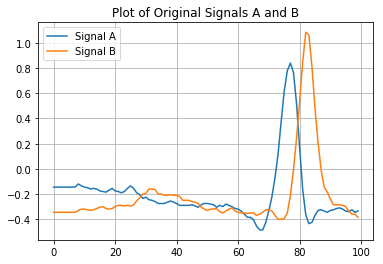

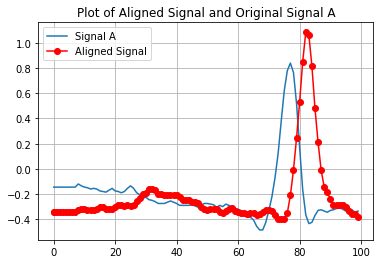

In [20]:
#compute accumlated cost matrix and alignment
a1 = DTW(signal_A,signal_B)
p1 = warpPath(a1)

print(len(signal_A))
#plot original signals
plt.title('Plot of Original Signals A and B')
plt.plot(signal_A,label = 'Signal A')
plt.plot(signal_B,label = 'Signal B')

plt.grid()
plt.legend( loc = 'best')
plt.show()

#plot aligned signal
alignment_x1=[]
alignment_y1=[]

#append the x position and y values for aligned signal
for j,i in p1:
    alignment_x1.append([j])
    alignment_y1.append(signal_B[i])
#print(p1)
    
plt.title('Plot of Aligned Signal and Original Signal A')
plt.plot(signal_A,label = 'Signal A')
plt.plot(alignment_x1,alignment_y1,'bo-',color = 'red', label = 'Aligned Signal')
    
plt.grid()
plt.legend(loc = 'best')
plt.show()